1. Загрузите файл HR.csv в pandas dataframe

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

1. Загрузите файл HR.csv в pandas dataframe

In [34]:
hr = pd.read_csv('HR.csv')
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
hr.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


Пропуски данных в датафрейме отсутствуют.

Для количественных столбцов 'satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company' расчитаем базовые статистики:

In [ ]:
hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


Для качественных столбцов рассчитаем моду:

In [ ]:
hr[['Work_accident','left','promotion_last_5years','department','salary']].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [20]:
corr_matr = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr()

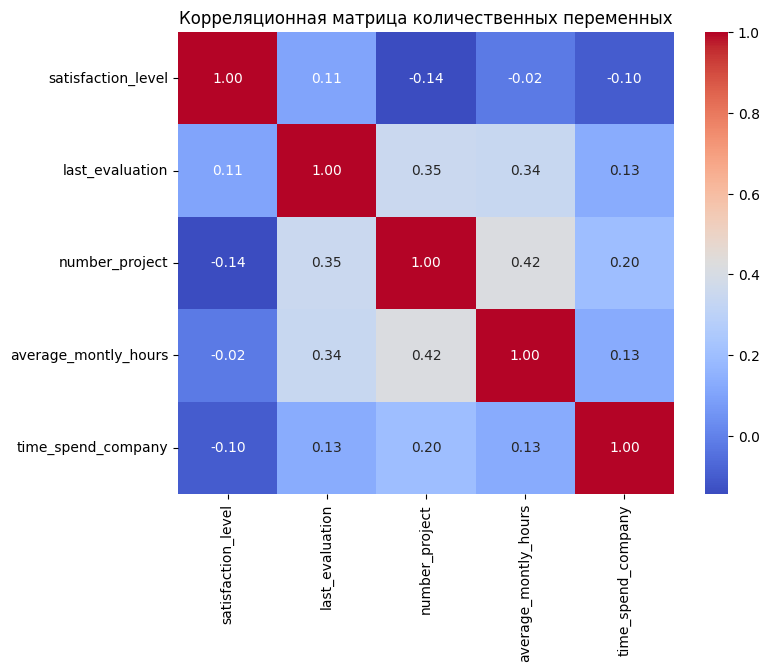

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица количественных переменных')
plt.show()

Из тепловой матрицы видно, что наиболее скорелированные данные в столбцах 'number_project' и 'average_montly_hours', а наименее скоррелированные в 'number_project' и 'satisfaction_level'.

4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [30]:
depart_employe=hr['department'].value_counts().head(100)
depart_employe

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


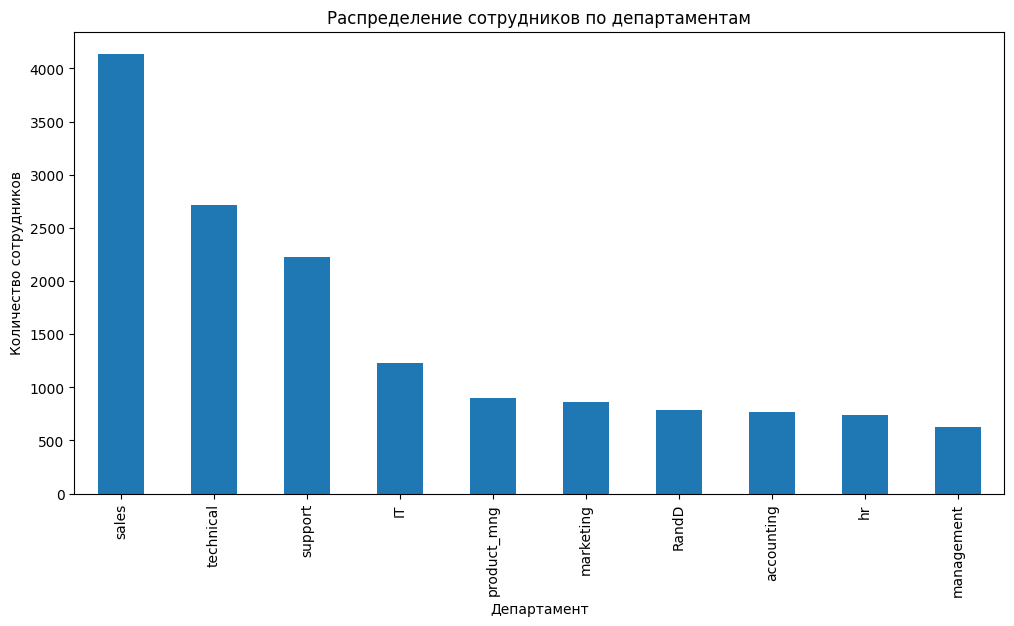

In [31]:
plt.figure(figsize=(12, 6))
depart_employe.plot(kind='bar')
plt.title('Распределение сотрудников по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.show()

5. Показать распределение сотрудников по зарплатам.

In [43]:
salary_employe = hr['salary'].value_counts(normalize=True)
salary_employe

,proportion
salary,
low,0.487766
medium,0.429762
high,0.082472


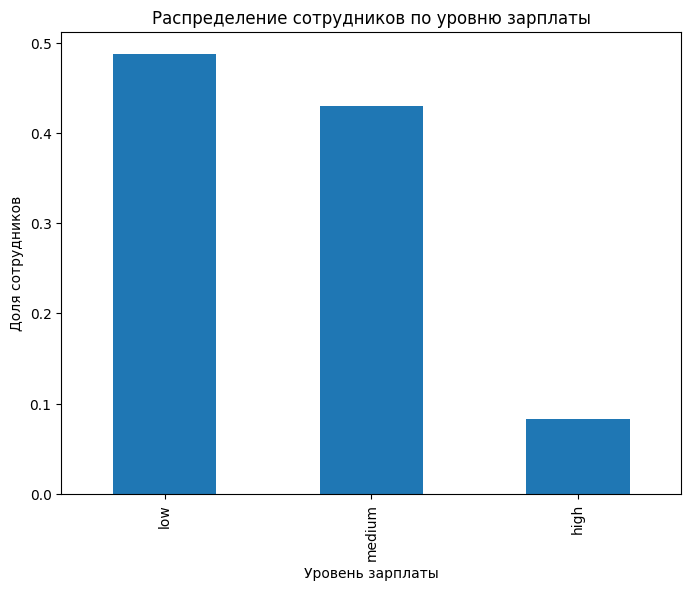

In [44]:
plt.figure(figsize=(8, 6))
salary_employe.plot(kind='bar')
plt.title('Распределение сотрудников по уровню зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Доля сотрудников')
plt.show()

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности


In [ ]:
salary_department = pd.pivot_table(data=hr, index='department', columns='salary', values='left', aggfunc='count')
salary_department

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


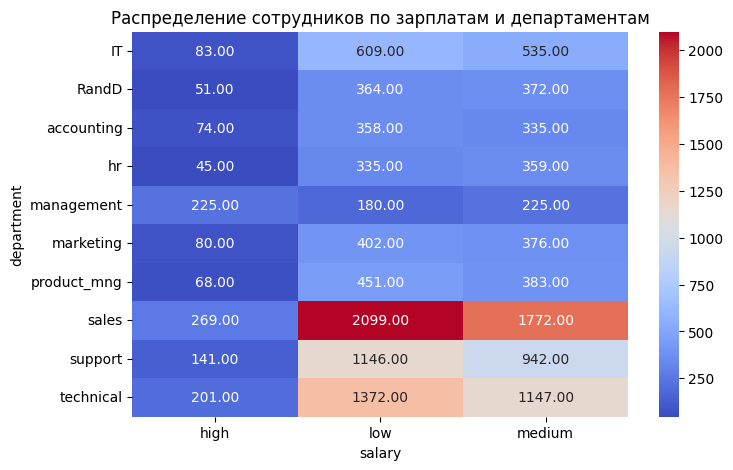

In [ ]:
plt.figure(figsize=[8,5])
sns.heatmap(salary_department, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Распределение сотрудников по зарплатам и департаментам")
plt.show()

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [21]:
salary_mon_hours = pd.pivot_table(data=hr, index='salary', values='average_montly_hours', aggfunc='mean')
salary_mon_hours_1 = salary_mon_hours.sort_values(by='average_montly_hours', ascending=False)
salary_mon_hours_1

,average_montly_hours
salary,
medium,201.338349
low,200.996583
high,199.867421


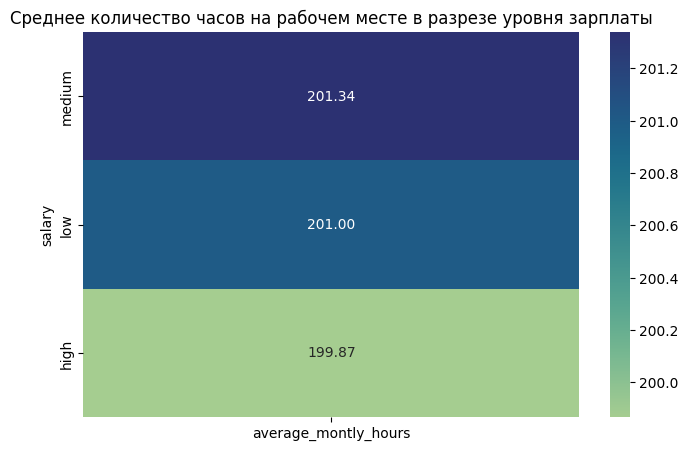

In [22]:
plt.figure(figsize=[8,5])
sns.heatmap(salary_mon_hours_1, annot=True, cmap='crest', fmt='.2f')
plt.title("Среднее количество часов на рабочем месте в разрезе уровня зарплаты")
plt.show()

Из тепловой карты видно, что гипотеза не подтверждается. Сотрудники с высоким уровнем оплаты в среднем проводят на работе меньше времени, чем сотрудники с низким уровнем оплаты.

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
*  Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [43]:
person_promotion = pd.crosstab(hr['left'], hr['promotion_last_5years'], normalize='index')
person_promotion

promotion_last_5years,0,1
left,,
0,0.973749,0.026251
1,0.994679,0.005321


Среди уволившихся сотрудников повышались 0.5% сотрудников, среди нынешних сотрудников повышалось 2.6% сотрудников.

In [47]:
person_satisf = pd.pivot_table(data=hr, index='left', values='satisfaction_level', aggfunc='mean')
person_satisf



,satisfaction_level
left,
0,0.666810
1,0.440098


Средняя удовлетворенность работой у нынешних сотрудников выше, чем у уволившихся

In [49]:
person_proj = pd.pivot_table(data=hr, index='left', values='number_project', aggfunc='mean')
person_proj


,number_project
left,
0,3.786664
1,3.855503


9. Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборки

In [63]:
# Подготовка данных
X = hr[['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years']]
y = hr['left']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nОценка качества модели LDA:")
print(f"Точность модели: {accuracy:.2f}")
print(f"Матрица ошибок: \n{conf_matrix}")


Оценка качества модели LDA:
Точность модели: 0.76
Матрица ошибок: 
[[3138  290]
 [ 809  263]]


Модель предсказания уволенения сотрудников показывает достаточно высокую точность - 77%.